# Understading Brownian Motion

The purpose of this notebook is to review and illustrate the [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion) and some of its main properties.

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from aleatory.processes import BrownianMotion

In [102]:
%config InlineBackend.figure_format ='retina'
%config Completer.use_jedi = False

In [103]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams['figure.dpi'] = 100

## Definition

**Definition** A standard Brownian motion or Wiener process is a stochastic process $W =\{W_t, t\geq 0\}$ characterised by the following properties:
1. $W_0 = 0$
2. $W_t-W_s \sim N(0, t-s),$ for any $0\leq s \leq t$
3. $W_t$ has independent increments
4. $W_t$ is almost surely continuous.

## Marginal Distribution

The above definition implies that  each marginal distribution $W_t,$ for  $t>0$ is normally distributed with expectation zero, and variance equals $t$, i.e.:

\begin{equation}
W_t \sim \mathcal{N}(0,t), \qquad \forall t>0.
\end{equation}

### Sampling

Then, for any given $t>0$, we can sample from $W_t$ in different ways. One option consist of creating an object  `norm`  from the library `scipy.stats`.  The next cell shows how to obtain a random sample from $W_1$ using this method.

In [104]:
W_1 = norm(loc=0, scale= np.sqrt(1))
W_1.rvs(size=3)

array([-0.37441526, -0.02285951,  1.63082276])

An alternative method to obtain a sample from the  marginal distributions $W_t$ is by creating an object  `BrownianMotion` from `aleatory.processes` and calling the method `get_marginal`. The next cell shows how to obtain a random sample from $W_1$ using this method.

In [105]:
process = BrownianMotion()
W_1 = process.get_marginal(t=1) 
W_1.rvs(size=3)

array([-1.31893794, -0.33763475, -0.42472261])

### Visualising the PDF

We can plot the probability density function (pdf) of $W_1$ as follows.

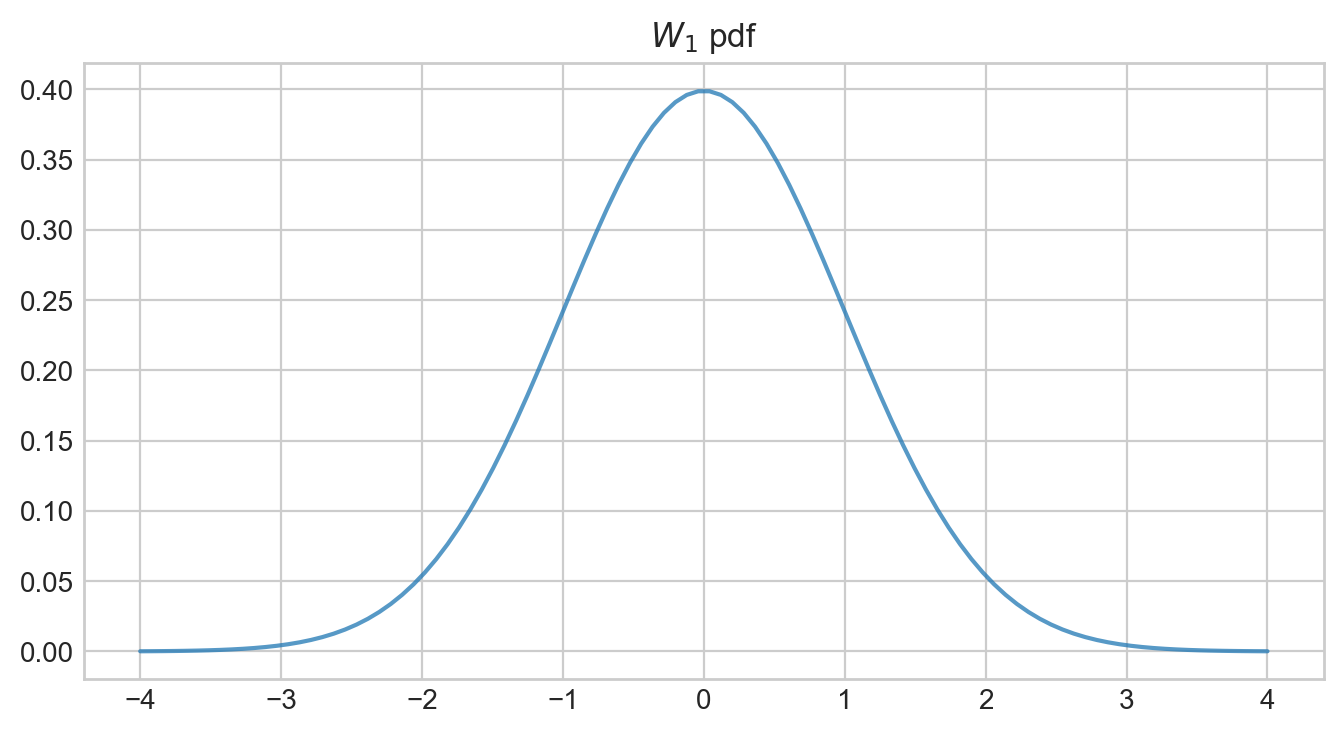

In [106]:
x = np.linspace(-4, 4,100)
plt.plot(x, W_1.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={1:.2f}')
plt.title(f'$W_1$ pdf')
plt.show()

Let's take a look at the probability density functions for different marginal distributions $W_t$.

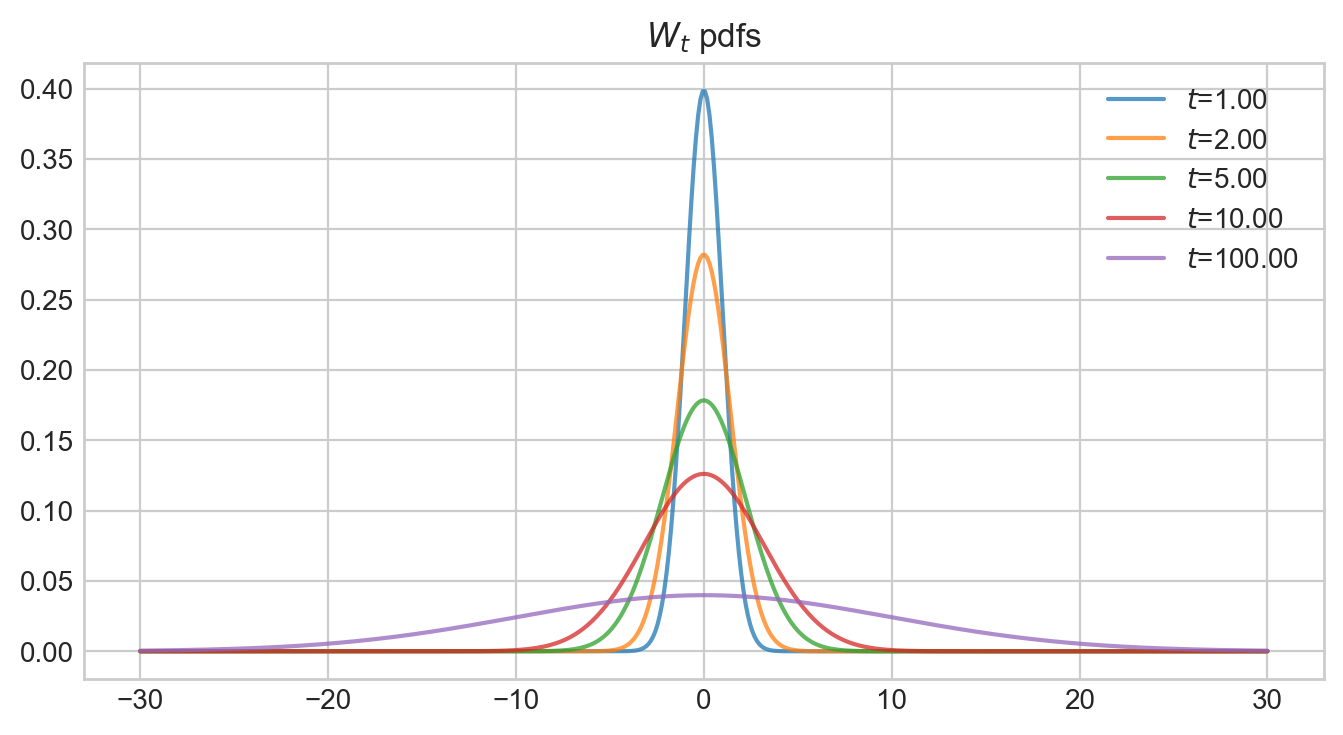

In [107]:
fig, ax1 = plt.subplots(1, 1)
for t in [1,2,5, 10, 100]:
    W_t= process.get_marginal(t)
    x = np.linspace(-30, 30, 500)
    ax1.plot(x, W_t.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$t$={t:.2f}')
ax1.legend()
plt.title('$W_t$ pdfs')
plt.show()

From this chart, we can make the following observations:

- We clearly see the characteristic symmetric bell-shaped curves of the normal/Gaussian distributions
- The Brownian motion will clearly take positive and negative values 
- The Brownian motion would take bigger (in magnitude) values as $t$ increases
- The marginal distributions of the Brownian Motion flatten/spread as $t$ increases. Indeed, it will ultimately become uniform in the limit when time goes to infinity

## Simulation

In order to simulate paths from a stochastic process, we need to set a discrete partition over an interval for the simulation to take place. For simplicity, we are going to consider an equidistant partition of size $n$ over $[0,T]$, i.e.:
\begin{equation}
t_i = \frac{i}{n-1} T,
\end{equation}
for all $i = 0, \cdots, n-1$. Then, the goal is to simulate a path of the form $\{ W_{t_i}, i=1,\cdots, n-1\}$. There are different ways to do this. Here, we are going to use the fact tha we can express each $W_{t_i}$ as follows:
\begin{align*}
W_0 &= 0 \\
W_{t_1} = (W_{t_1} - W_0)  + W_0 & \sim N\left(0,\frac{T}{n-1}\right) \\
W_{t_2} = (W_{t_2} - W_{t_1}) + W_{t_1} &  \sim N\left(0,\frac{T}{n-1}\right) + W_{t_1}    \\ 
W_{t_3} = (W_{t_3} - W_{t_2}) + W_{t_2}  & \sim N\left(0,\frac{T}{n-1}\right) + W_{t_2}    \\ 
 & \cdots & \\
 W_{t_{n-1}} = (W_{t_{n-1}} - W_{t_{n-2}}) + W_{t_{n-2}}& \sim N\left(0,\frac{T}{n-1}\right) + W_{t_{n-2}}. 
\end{align*}
Thus, we can built the path by simply simulating from a normal distribution $N(0,\frac{T}{n-1})$ and then taking the cumulative sum. This is done in the following cells. 

First, we construct the partition, and calculate the variance of the normal distribution:

In [108]:
T = 1.0
n = 100
times = np.linspace(0, T, n)
sigma_squared = T/(n-1)

and now we can simulate from the normal distribution and calculate the cumulative sum:

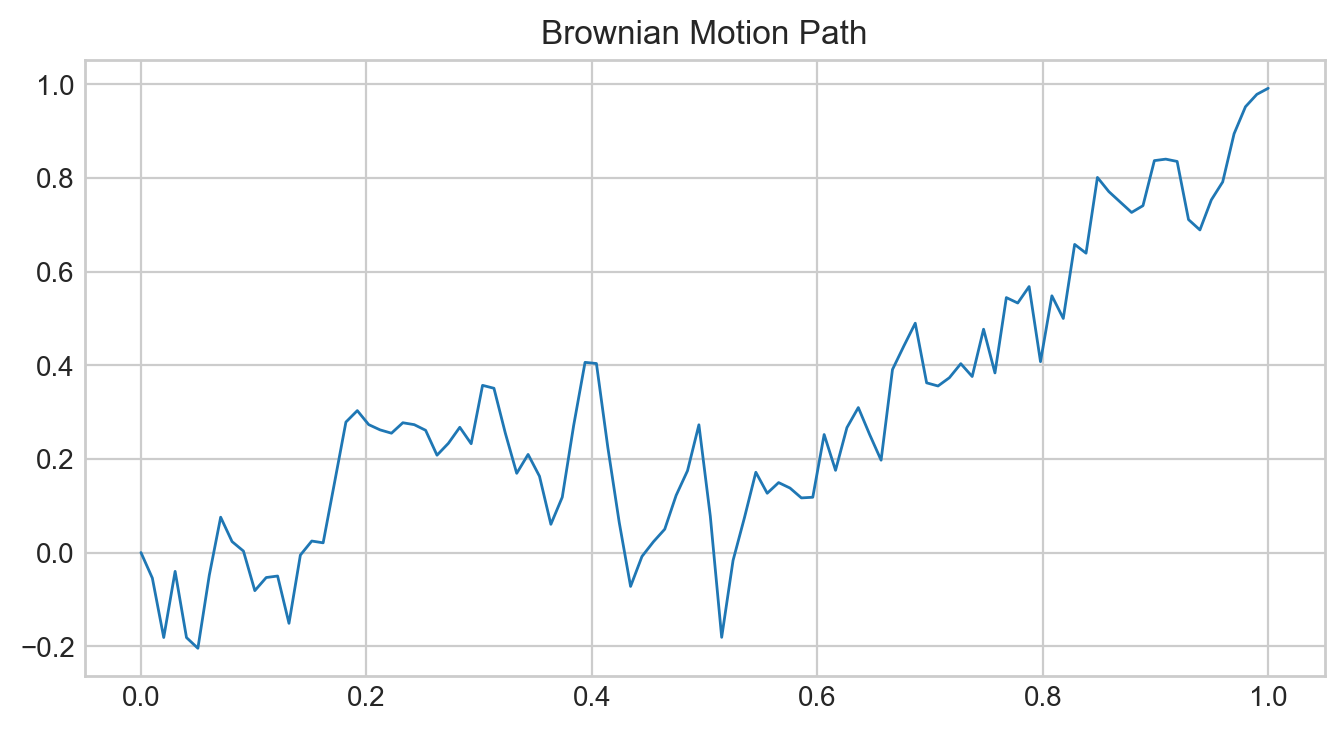

In [109]:
normal_increments = norm.rvs(loc=0, scale=np.sqrt(sigma_squared), size=n-1)
normal_increments = np.insert(normal_increments, 0, 0) # This is the initial point
Wt = normal_increments.cumsum()
plt.plot(times, Wt, '-', lw=1)
plt.title('Brownian Motion Path')
plt.show()

To visualise several paths of Brownian Motion, we can use the method `plot` from the `aleatory` library. Here, we simulate 10 paths over the interval $[0,1]$. Note that the number of points on the partition is defined by the parameter $n$.

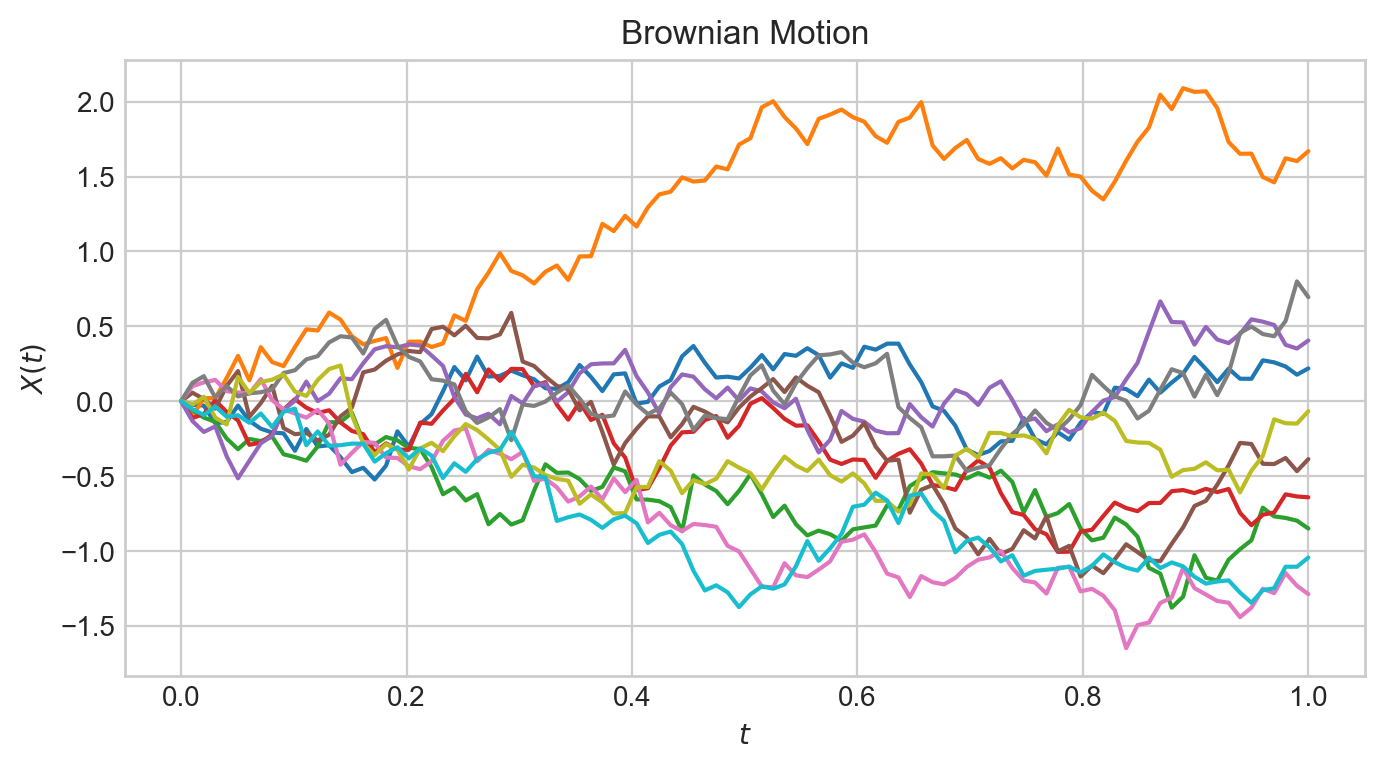

In [110]:
process = BrownianMotion()
process.plot(n=100, N=10)
plt.show()

Next, we define the Brownian Motion over the interval $[0, 10]$ and simulate 50 paths with a partition of size 100.

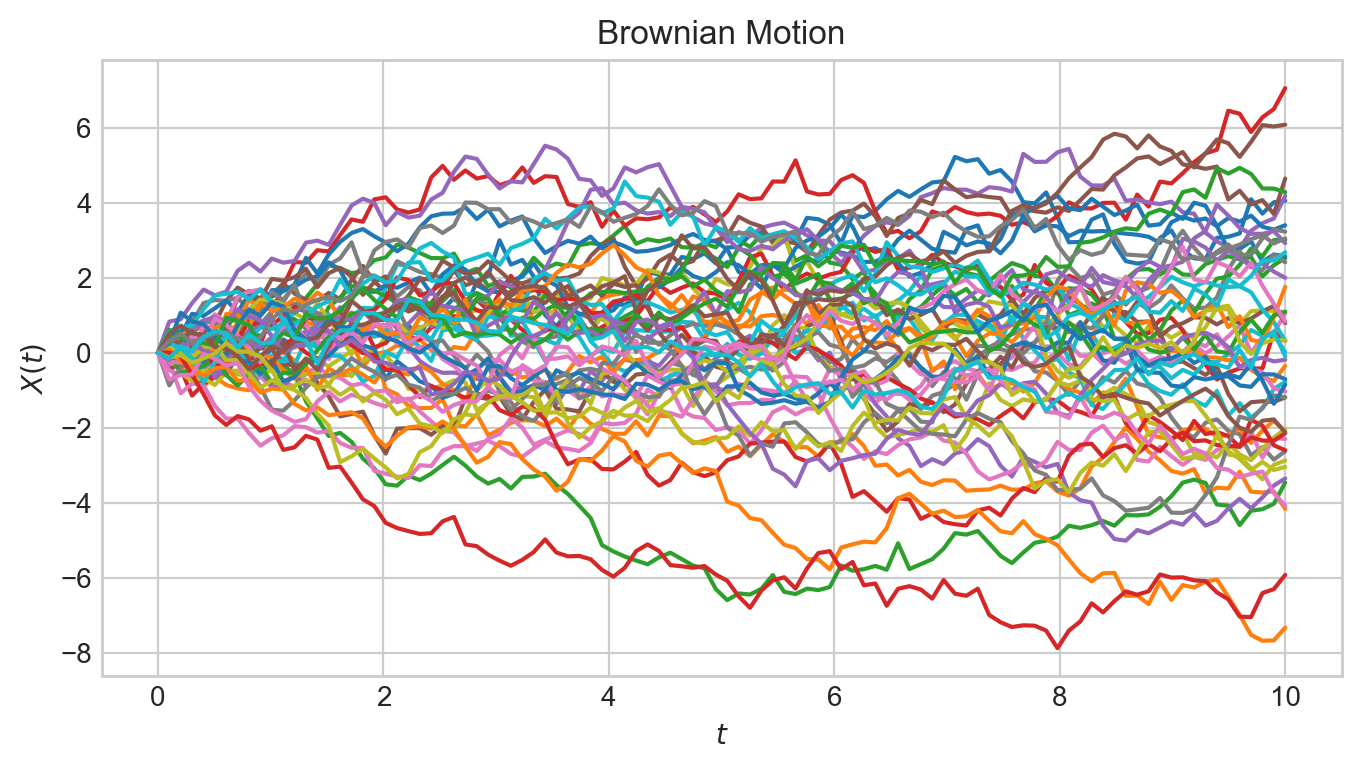

In [111]:
process = BrownianMotion(T=10)
process.plot(n=100, N=50)
plt.show()

## Long Time Behaviour

Almost surely 

$$\lim_{t \rightarrow \infty} \frac{W_t}{t}  = 0.$$

This property is the analogous of the Law of Large Numbers and sometimes is referred as such. 

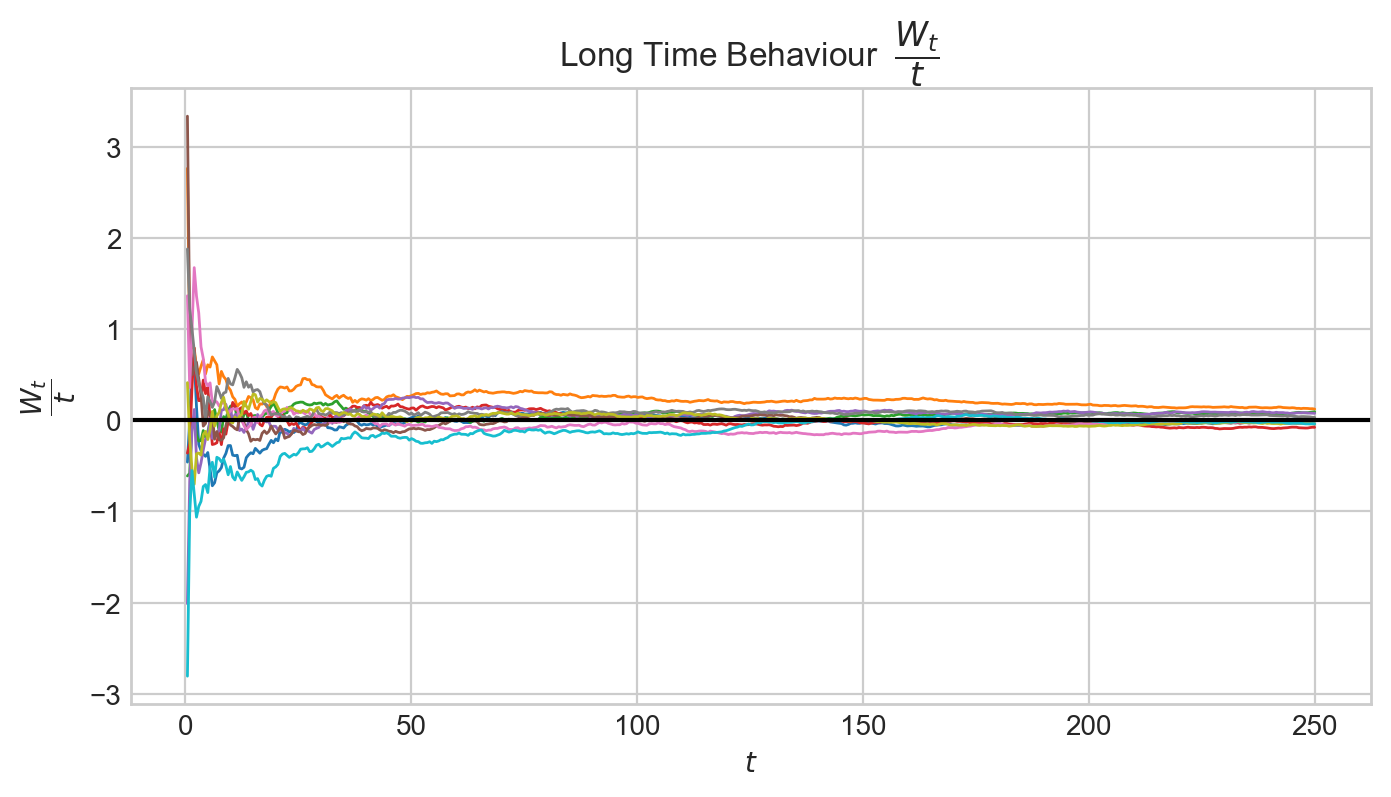

In [112]:
process = BrownianMotion(T=250)
paths = process.simulate(n=500, N=10)
t = process.times

for w in paths:
    plt.plot(t[1:], w[1:]/t[1:], '-', lw=1)
plt.axhline(y=0, lw=1.5, color='black')
plt.title('Long Time Behaviour  $\dfrac{W_t}{t}$ ')
plt.xlabel('$t$')
plt.ylabel('$\dfrac{W_t}{t}$')
plt.show()
    

## Reflection Principle

If $W_t$ is a Brownian motion and $a>0$, then 
\begin{equation}
P\left( \sup_{0\leq s  \leq t} W_s \geq a \right) = 2P(W_t\geq a)
\end{equation}

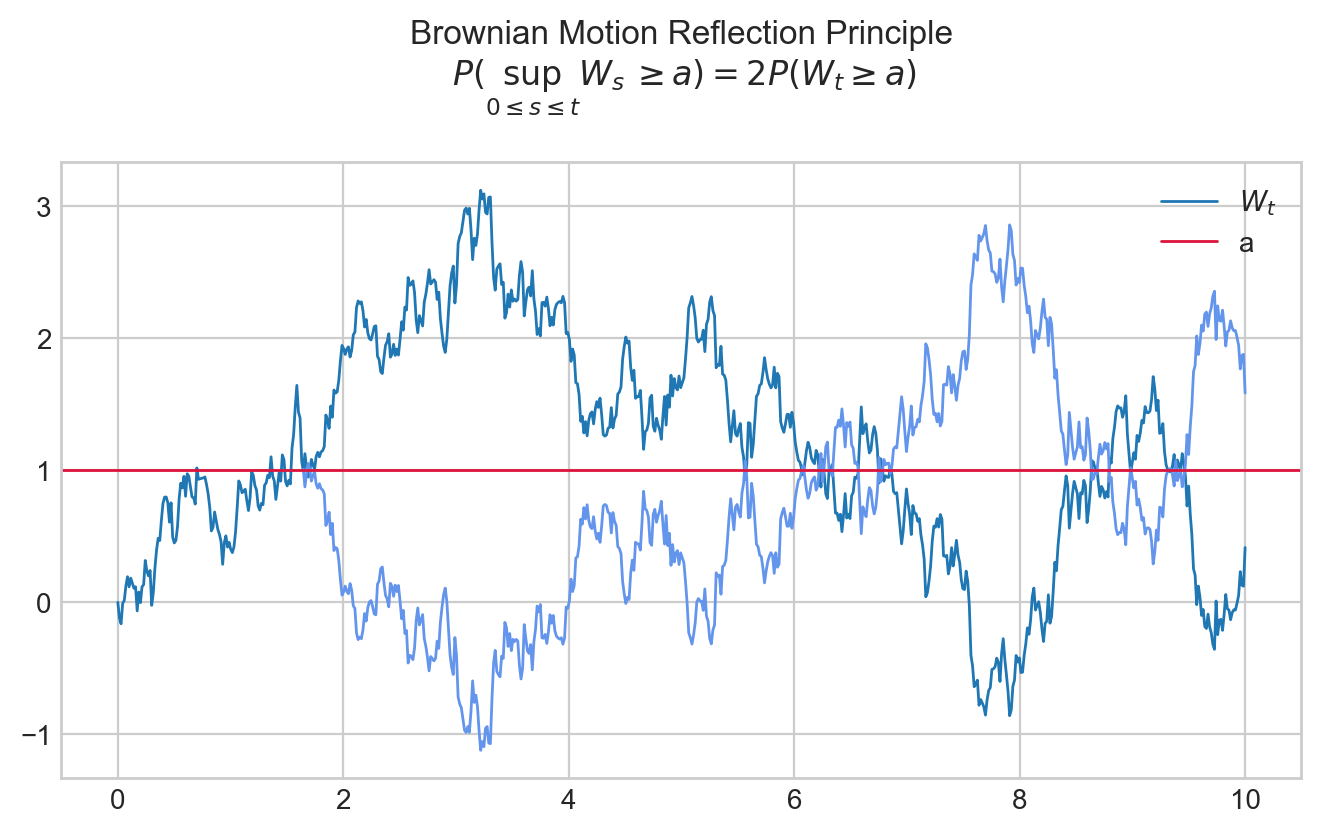

In [113]:
process = BrownianMotion(T=10, rng=np.random.default_rng(seed=123))
bms = process.sample(n=700)
ts = process.times
a = 1.0
fht = np.where(np.isclose(bms, a, rtol=0.01))[0][0]
plt.figure()
plt.plot(ts, bms, '-', lw=1, label="$W_t$")
plt.plot(ts[fht:], -bms[fht:] + 2*a, '-', lw=1, color='cornflowerblue')
plt.axhline(y=a, lw=1, color='crimson', label='a')
plt.title(
    'Brownian Motion Reflection Principle\n $P(\sup_{0\leq s  \leq t} W_s \geq a ) = 2P(W_t\geq a)$ \n')
plt.legend()
plt.show()

Finally, let's take a look at the following chart showing 100 simulated paths over the interval $[0,10]$.

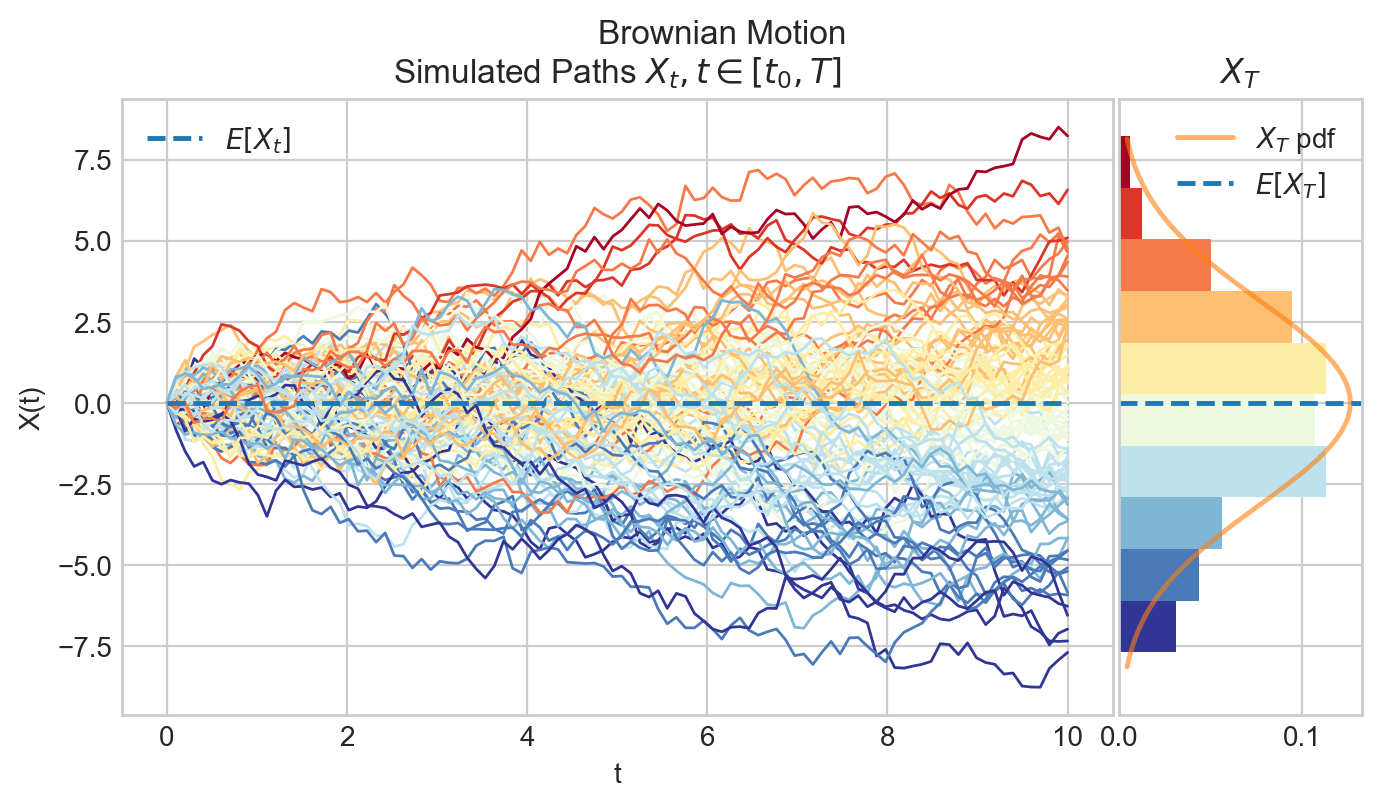

In [114]:
process = BrownianMotion(T=10)
process.draw(n=100, N=100)
plt.show()

## References and Further Reading

- [The Brownian Movement](https://feynmanlectures.caltech.edu/I_41.html) by Feynman, R. (1964) in "The Feynman Lectures of Physics", Volume I. pp. 41–1.
